In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import h5py

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import importlib

In [4]:
from glob import glob

In [5]:
# files_loc = "/sdf/home/r/rafaeltl/home/rafaeltl/Muon/Feb15/si-mu-lator/batch_slac/out_files/March24_bkgr_2375000/"
files_loc = "/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/"

In [6]:
# files_bkg = glob(files_loc+'*Muon*bkgr*70000.0*.h5')
files_sig = glob('/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/*WithMuon*.h5')
files_bkg = glob('/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1_override_4/*NoMuon*.h5')
all_files = files_sig +files_bkg

In [19]:
import dataprep
importlib.reload(dataprep)

<module 'dataprep' from '/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/nn/notebooks/dataprep.py'>

In [20]:
data, dmat, Y, Y_mu, Y_hit, sig_keys = dataprep.make_data_matrix(all_files, max_files=500, sort_by='z')

/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/WithMuon.atlas_mm_road.nevs_1000.bkgr_1.mux.-2.0.2.0_Rnd535837.h5
['is_muon', 'x', 'y', 'z', 'ptype', 'ptilt', 'poffset', 'time', 'projX_at_rightend_x', 'projX_at_rightend_y', 'projX_at_middle_x', 'projX_at_middle_y', 'projY_at_topend_x', 'projY_at_topend_y', 'projY_at_middle_x', 'projY_at_middle_y', 'seg_ix', 'rdrift']
/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/WithMuon.atlas_mm_road.nevs_1000.bkgr_1.mux.-2.0.2.0_Rnd535845.h5
/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/WithMuon.atlas_mm_road.nevs_1000.bkgr_1.mux.-2.0.2.0_Rnd535870.h5
/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/WithMuon.atlas_mm_road.nevs_1000.bkgr_1.mux.-2.0.2.0_Rnd535813.h5
/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/WithMuon.atlas_mm_road.nevs_1000.bkgr_1.mux.-2.0.2.0_Rn

In [21]:
data.keys()

dict_keys(['ev_mu_phi', 'ev_mu_theta', 'ev_mu_time', 'ev_mu_x', 'ev_mu_y', 'ev_n_mu_signals', 'ev_n_signals'])

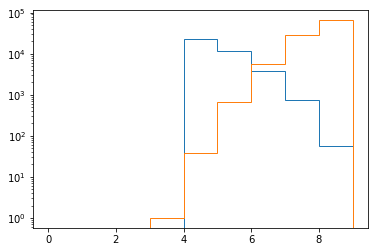

In [23]:
plt.Figure()
# plt.hist(data['ev_n_mu_signals'], histtype='step', bins=9, range=(0,9), label='Mu hits')
# plt.hist(data['ev_n_signals'] - data['ev_n_mu_signals'], histtype='step', bins=9, range=(0,9), label='Noise hits')
plt.hist(data['ev_n_signals'][Y_mu==0], histtype='step', bins=9, range=(0,9), label='Total hits')
plt.hist(data['ev_n_signals'][Y_mu==1], histtype='step', bins=9, range=(0,9), label='Total hits')
# plt.legend(loc='upper left')
plt.yscale('log')
plt.show()

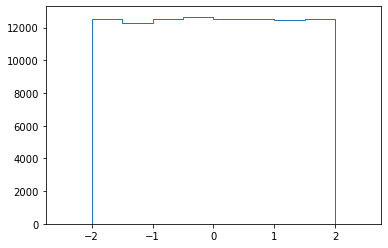

In [24]:
plt.Figure()
plt.hist(data['ev_mu_x'], histtype='step', bins=10, range=(-2.5, 2.5))
plt.show()

In [25]:
import sys

In [26]:
sys.path.insert(0, '../')

In [27]:
import linefit
importlib.reload(linefit)

<module 'linefit' from '/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/nn/notebooks/../linefit.py'>

In [28]:
lfits = linefit.get_fits(dmat, sig_keys)

In [29]:
data['ev_n_mu_signals']==8

array([False,  True,  True, ..., False, False, False])

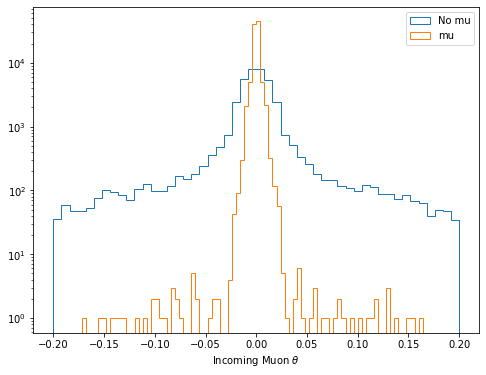

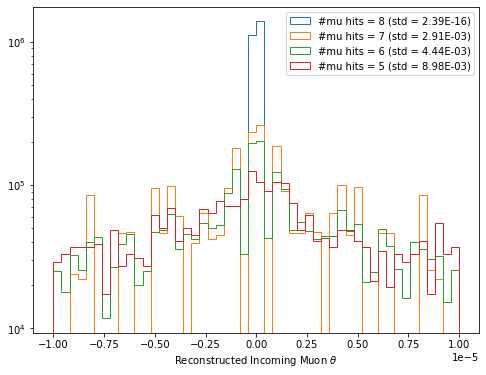

In [30]:
plt.figure(figsize=(8,6))
plt.hist( lfits[:,0][(data['ev_n_signals']>1)&(Y_mu==0)], histtype='step', bins=50, range=(-0.20001, 0.20001), label='No mu' )
plt.hist( lfits[:,0][Y_mu==1], histtype='step', bins=100, range=(-0.2, 0.2),label='mu' )
plt.xlabel(r'Incoming Muon $\theta$')
plt.legend()
plt.yscale('log')
plt.show()

plt.figure(figsize=(8,6))
nhts = 8
v = lfits[:,0][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=50, range=(-0.00001, 0.00001),label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

nhts = 7
v = lfits[:,0][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=50, range=(-0.00001, 0.00001),label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

nhts = 6
v = lfits[:,0][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=50, range=(-0.00001, 0.00001),label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

nhts = 5
v = lfits[:,0][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=50, range=(-0.00001, 0.00001),label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

plt.xlabel(r'Reconstructed Incoming Muon $\theta$')
plt.legend()
plt.yscale('log')
plt.show()

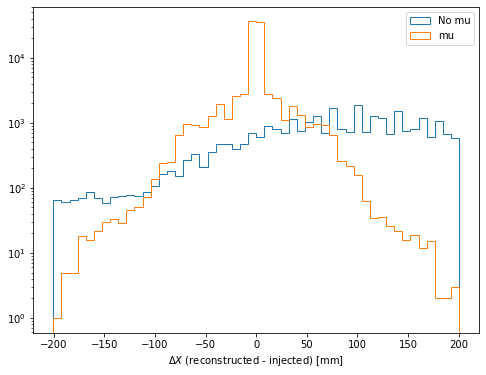

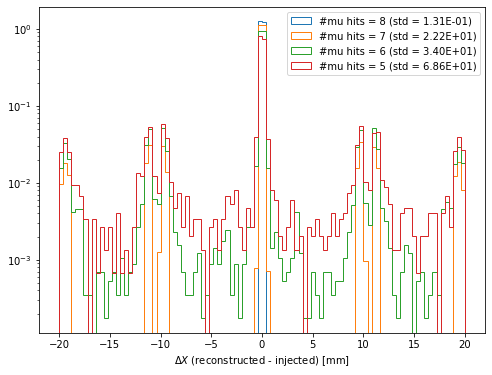

In [31]:
plt.figure(figsize=(8,6))
plt.hist( lfits[:,1][(data['ev_n_signals']>1)&(Y_mu==0)] - data['ev_mu_x'][(data['ev_n_signals']>1)&(Y_mu==0)], histtype='step', bins=50, range=(-200.5, 200.5), label='No mu' )
plt.hist( lfits[:,1][Y_mu==1] - data['ev_mu_x'][Y_mu==1], histtype='step', bins=50, range=(-200.5, 200.5), label='mu' )
plt.legend()
plt.yscale('log')
plt.xlabel(r'$\Delta X$ (reconstructed - injected) [mm]')
plt.show()

plt.figure(figsize=(8,6))
nhts = 8
rng=(-20,20)
bns=100
v = lfits[:,1][(data['ev_n_mu_signals']==nhts)] - data['ev_mu_x'][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=bns, range=rng,label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

nhts = 7
v = lfits[:,1][(data['ev_n_mu_signals']==nhts)] - data['ev_mu_x'][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=bns, range=rng,label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

nhts = 6
v = lfits[:,1][(data['ev_n_mu_signals']==nhts)] - data['ev_mu_x'][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=bns, range=rng,label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

nhts = 5
v = lfits[:,1][(data['ev_n_mu_signals']==nhts)] - data['ev_mu_x'][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=bns, range=rng,label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

plt.legend()
plt.yscale('log')
plt.xlabel(r'$\Delta X$ (reconstructed - injected) [mm]')

plt.show()

In [32]:
(lfits[:,1][(data['ev_n_mu_signals']==8)] - data['ev_mu_x'][(data['ev_n_mu_signals']==8)]).std()

0.13060194019138008

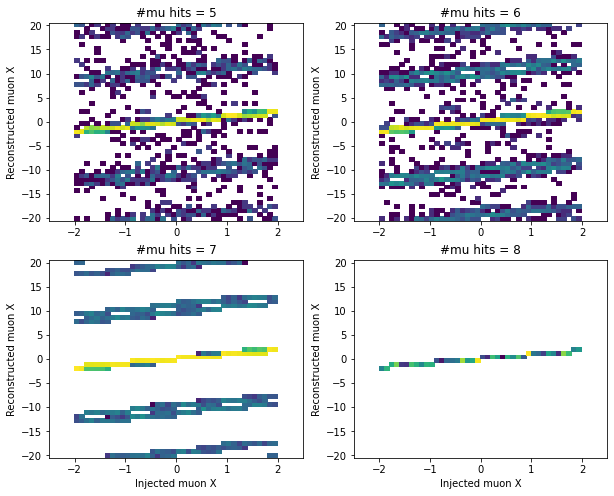

In [33]:
ncols=2
nrows=2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()

for nht in range(5, 9):
    axs[nht-5].hist2d( data['ev_mu_x'][(data['ev_n_mu_signals']==nht)], 
                      lfits[:,1][(data['ev_n_mu_signals']==nht)], bins=(50,50), range=((-2.5,2.5), (-20.5,20.5)),
                     norm=mpl.colors.LogNorm())
    if nht>6: axs[nht-5].set_xlabel('Injected muon X')
    axs[nht-5].set_ylabel('Reconstructed muon X')
    axs[nht-5].set_title(f'#mu hits = {nht}')

plt.show()

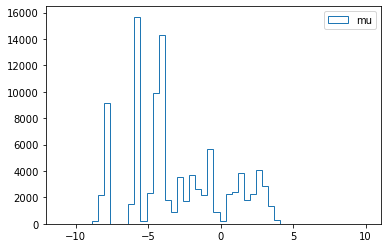

In [34]:
plt.Figure()
# plt.hist( (lfits[:,2][Y_mu==0]), histtype='step', bins=50, range=(0, 0.02), label='No mu' )
plt.hist( np.log(lfits[:,2][Y_mu==1]+1e-10), histtype='step', bins=50, range=(-11,10), label='mu' )
# plt.yscale('log')
plt.legend()
plt.show()

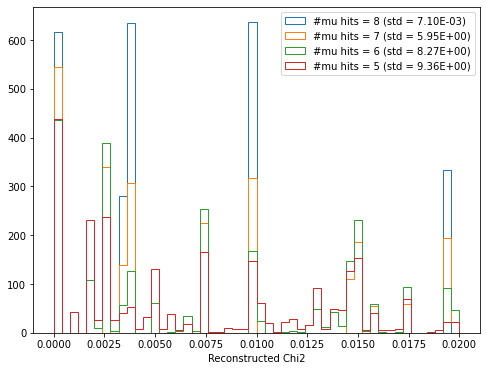

In [35]:
plt.figure(figsize=(8,6))
nhts = 8
v = lfits[:,2][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=50, range=(0, 0.02),label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

nhts = 7
v = lfits[:,2][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=50, range=(0, 0.02),label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

nhts = 6
v = lfits[:,2][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=50, range=(0, 0.02),label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

nhts = 5
v = lfits[:,2][(data['ev_n_mu_signals']==nhts)]
plt.hist( v, histtype='step',density=1, bins=50, range=(0, 0.02),label=f'#mu hits = {nhts} (std = {v.std():.2E})' )

plt.xlabel(r'Reconstructed Chi2')
plt.legend()
# plt.yscale('log')
plt.show()

In [36]:
np.min(lfits[:,2][Y_mu==1])

8.017375109283149e-05

In [37]:
lfits.shape

(139177, 3)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_train, Y_test, N_hit_train, N_hit_test = train_test_split(lfits, Y_mu, data['ev_n_signals'],
                                                    test_size=0.33, random_state=4653, shuffle=True)

In [40]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Layer, Masking, Input, Dense, concatenate
from tensorflow.keras.layers import ReLU, BatchNormalization, Attention
from tensorflow.keras.layers import BatchNormalization, Embedding, Lambda, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [41]:
inputs = Input(shape=(X_train.shape[1],), name="inputs")
hidden = BatchNormalization()(inputs)
hidden = Dense(20, activation="relu")(hidden)
hidden = Dense(20, activation="relu")(hidden)
hidden = Dense(20, activation="relu")(hidden)
output = Dense(1, activation="sigmoid")(hidden)
model = Model(inputs=inputs, outputs=output)

In [42]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 3)]               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3)                 12        
_________________________________________________________________
dense (Dense)                (None, 20)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 953
Trainable params: 947
Non-trainable params: 6
_______________________________________________________________

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [45]:
history = model.fit( X_train[N_hit_train>1], Y_train[N_hit_train>1],
                    callbacks = [
                            EarlyStopping(monitor='val_loss', patience=1000, verbose=1),
                            ModelCheckpoint(f'weights/chi2nn_test.h5', monitor='val_loss', verbose=True, save_best_only=True) ],
                    epochs=500,
                    validation_split = 0.3,
                    batch_size=10000,
                    verbose=1,
                    shuffle=True
                   )
    
model.load_weights(f'weights/chi2nn_test.h5')

Epoch 1/500
7/7 [==============================] - 19s 46ms/step - loss: 0.6810 - accuracy: 0.7150 - val_loss: 0.6911 - val_accuracy: 0.7192

Epoch 00001: val_loss improved from inf to 0.69115, saving model to weights/chi2nn_test.h5
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6586 - accuracy: 0.7433 - val_loss: 0.6663 - val_accuracy: 0.7941

Epoch 00002: val_loss improved from 0.69115 to 0.66635, saving model to weights/chi2nn_test.h5
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6384 - accuracy: 0.7668 - val_loss: 0.6462 - val_accuracy: 0.7943

Epoch 00003: val_loss improved from 0.66635 to 0.64621, saving model to weights/chi2nn_test.h5
Epoch 4/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6185 - accuracy: 0.7736 - val_loss: 0.6257 - val_accuracy: 0.7925

Epoch 00004: val_loss improved from 0.64621 to 0.62567, saving model to weights/chi2nn_test.h5
Epoch 5/500
7/7 [==============================] - 0s 7ms/step

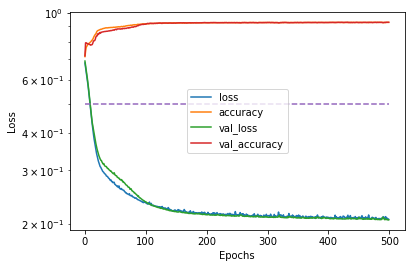

In [46]:
plt.Figure()
for kk in history.history.keys():
    plt.plot(history.history[kk], label=kk)
plt.plot([0,500], [0.5,0.5], '--')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.show()

In [47]:
from sklearn.metrics import roc_curve

1436/1436 [==============================] - 1s 708us/step


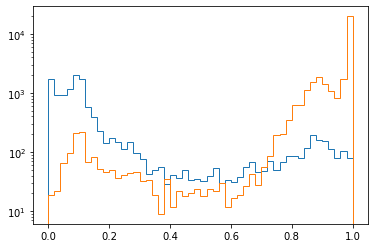

In [48]:
Y_pred = model.predict(X_test, verbose=1).flatten()

plt.Figure()
plt.hist(Y_pred[(N_hit_test>1)&(Y_test==0)], histtype='step', bins=50, range=(0,1))
plt.hist(Y_pred[(N_hit_test>1)&(Y_test==1)], histtype='step', bins=50, range=(0,1))
plt.yscale('log')
plt.show()

plt.show()

<ipython-input-49-ff2292a3e696>:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(tpr_mus, 1./fpr_mus)


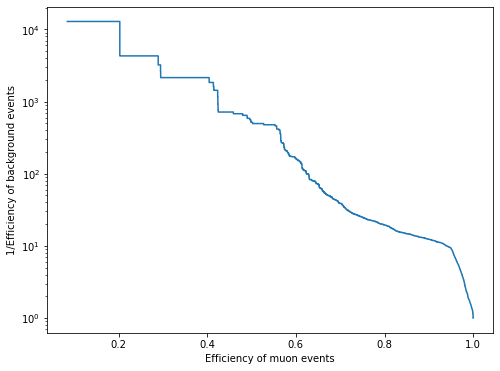

In [49]:
fpr_mus, tpr_mus, _     = roc_curve(Y_test[N_hit_test>1], Y_pred[N_hit_test>1])

plt.figure(figsize=(8,6))
plt.semilogy(tpr_mus, 1./fpr_mus)
# plt.xlim(0.8,1.01)
# plt.ylim(0.5, 1e5)
plt.xlabel('Efficiency of muon events')
plt.ylabel('1/Efficiency of background events')
plt.show()